#Тема дипломной работы: "Анализ продаж британского e-commerce (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели объёмов продаж)"


###Загрузка библиотек и открытие файла

In [ ]:
#импорт библиотек
import numpy as np
import pandas as pd

In [ ]:
#загружаем датафрейм
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

###Разведочный анализ данных

In [ ]:
#смотрим данные которые загрузили, предварительная аналитика
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#смотрим типы данных и количество данных в них
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Наименование полей и их расшифровка:
1.	InvoiceNo: номер транзакции, состоит из 6 цифр. 
2.	StockCode: код товара (позиции). 
3.	Description: описание товара
4.	Quantity: количество товара
5.	InvoiceDate: дата транзакции 
6.	UnitPrice: цена товара за единицу 
7.	CustomerID: номер клиента. Уникальное 5-значное целое число, присваиваемое каждому покупателю.
8.	Country: название страны, в которой проживает каждый покупатель.


**анализ info** *датафрейм в 541 909 строк и 8 полей. есть пропуски в поле Description и Customer ID*


In [ ]:
#смотрим статистику по данным инт и флоэт 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**анализ описания** *видим отрицательные значения в числах, нужно проверить почему и как повлияют они на аналитику*

In [ ]:
#смотрим минусы в прайсе
data[data.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


**Вывод по минусам в прайсе** *Считаю, что данные минуса нужно убрать,чтобы они не влияли на аналитику в целом.*

In [ ]:
#удалили строки 299983, 299984
data.drop(labels = [299983, 299984],axis = 0, inplace = True)

In [ ]:
#проверяем количество строк, было 541909, стало 541907
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541907 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541907 non-null  object 
 1   StockCode    541907 non-null  object 
 2   Description  540453 non-null  object 
 3   Quantity     541907 non-null  int64  
 4   InvoiceDate  541907 non-null  object 
 5   UnitPrice    541907 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541907 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
#данные удалены
data[data.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#смотрим минусы в количестве
data[data.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


**Вывод по минусам в количестве**  *эти минусы возврат продукта продавцу. Оставляем в продажах.*

***теперь смотрим пропуски в поле Description и Customer ID***


In [ ]:
#смотрим пустоту в кастомере
data[data.CustomerID.isna()].head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1537,536544,22207,FRYING PAN UNION FLAG,1,12/1/2010 14:32,8.47,NaN,United Kingdom
1538,536544,22219,LOVEBIRD HANGING DECORATION WHITE,3,12/1/2010 14:32,1.66,NaN,United Kingdom
1539,536544,22224,WHITE LOVEBIRD LANTERN,1,12/1/2010 14:32,5.91,NaN,United Kingdom
1540,536544,22265,EASTER DECORATION NATURAL CHICK,2,12/1/2010 14:32,1.28,NaN,United Kingdom


**Вывод по пустоте в кастомере** *данные в полях в кастомере по пустоте несут важную инфу для аналитики и планирования продаж, заполняем ее нулем*

In [ ]:
#заполняем пустоту в кастомере на 0
data = data.fillna({'CustomerID':0})

In [ ]:
#проверяем свои действия, реально заполнено) нет пустых в кастомере
data[data.CustomerID.isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#смотрим поле описание товара и услуги
data[data.Description.isna()].head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,0.0,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,0.0,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,0.0,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
21785,538136,37509,NaN,2,12/9/2010 15:57,0.0,0.0,United Kingdom
21786,538137,62095B,NaN,2,12/9/2010 15:57,0.0,0.0,United Kingdom
21787,538138,72814,NaN,2,12/9/2010 15:57,0.0,0.0,United Kingdom
21788,538139,84802A,NaN,2,12/9/2010 15:57,0.0,0.0,United Kingdom


**Вывод по пустоте в товарах** *данные в полях не несут важную инфу для аналитики и планирования продаж, заполняем ее нулем и после удаляем*

In [ ]:
#заполняем пустоту в описание на 0
data['Description'] = data['Description'].fillna('0')

In [ ]:
#удаляем услуга  по значению 0, скорее всего это ошибки которые повлияют на результат прогноза
data = data.query("Description != 0")

In [ ]:
#удаляем строки с ценой по значению 0, скорее всего это ошибки которые повлияют на результат прогноза
data = data.query("UnitPrice != 0")

In [ ]:
#проверяем свои действия, реально заполнено) нет пустых в описании
data[data.Description.isna()].head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
data[data.UnitPrice.isna()].head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#смотрим, все ли данные есть в таблице?! да вся пустота заполнена.
data.isna().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

**Все пустоты заполнены! Данные, которые могут негативно повлиять на аналитику удалены.**



### Меняем формат данных и добавляем расчетное поле тотал продаж.

In [ ]:
import datetime as dt

In [ ]:
#меняем формат кастомера и даты
data.CustomerID = data.CustomerID.astype('int64')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
#добавить полу тотал продаж
data['Total_sum']=data['Quantity']*data['UnitPrice']

In [ ]:
#проверяем данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   539392 non-null  int64         
 7   Country      539392 non-null  object        
 8   Total_sum    539392 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 41.2+ MB


In [ ]:
#смотрим данные
data.head(5000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
5007,536836,21154,RED RETROSPOT OVEN GLOVE,1,2010-12-02 18:08:00,1.25,18168,United Kingdom,1.25
5008,536836,21154,RED RETROSPOT OVEN GLOVE,2,2010-12-02 18:08:00,1.25,18168,United Kingdom,2.50
5009,536836,21035,SET/2 RED RETROSPOT TEA TOWELS,1,2010-12-02 18:08:00,2.95,18168,United Kingdom,2.95
5010,536836,47570B,TEA TIME TABLE CLOTH,1,2010-12-02 18:08:00,10.65,18168,United Kingdom,10.65


**Выводы развед анализа данных:**

*предварительная обработка завершена- пустота заполнена, сомнительные инвойсы 
удалены, формат данных кастомер и дата изменен, данные, которые могут повлиять на планирование удалены. Можем продолжать анализировать.*

##Создаем ДФ для предварительной аналитики ( поиск топ в sku, стране, пользователях)

На какие вопросы предварительно по данному дф мы можем ответит, которые будут полезны стейкхолдерам:

*1.   ТОПЫ по странам с максимальным количеством заказов*

*2.   ТОПЫ по странам с максимальным количеством пользователей*

*3.   ТОПЫ в позициях и услугах*



In [ ]:
##создадим новый датафрейм для анализа, возьмем все продажи больше 0
data_new = data.query('UnitPrice > 0')
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


пойдем от крупного к мелкому при аналезе продаж

In [ ]:
#основное посмотрим сколько товаров всего продается и из каких стран делают покупки.

print('Всего услуг и товаров =',data_new.Description.nunique())
print('Всего стран =',data_new.Country.nunique())

Всего услуг и товаров = 4042
Всего стран = 38


**ТОП СТРАН**

In [ ]:
#TOP5 страны с количеством заказов
data_new0 = data_new.groupby('Country').agg({'InvoiceNo': 'count'}).sort_values('InvoiceNo', ascending=False).reset_index().head(5)
data_new0

,Country,InvoiceNo
0,United Kingdom,492979
1,Germany,9493
2,France,8556
3,EIRE,8192
4,Spain,2532


In [ ]:
import matplotlib.pyplot as plt

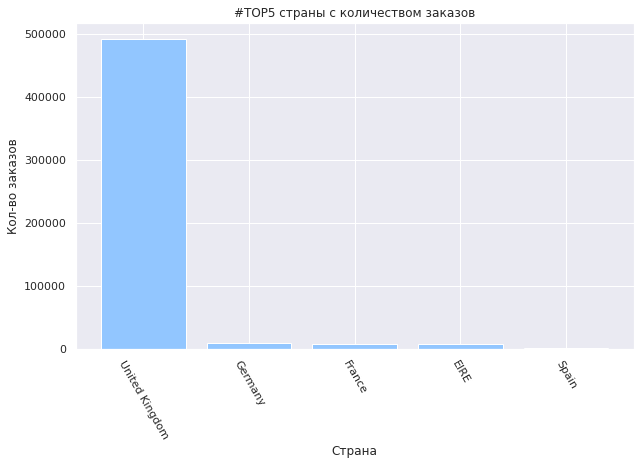

In [ ]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10,6))
    plt.bar(x=data_new0['Country'], height=data_new0['InvoiceNo'])
    plt.title('#TOP5 страны с количеством заказов')
    plt.ylabel('Кол-во заказов')
    plt.xlabel('Страна')
    plt.xticks(rotation=300);

**Вывод** *Топ по странам занимает United Kingdom c числом заказов 492979, следующая страна по численности Germany – 9493 заказа за период.*

**ТОП СТРАНАМ ПО КОЛИЧЕСТВУ ПОЛЬЗОВАТЕЛЕЙ**

In [ ]:
#TOP5 с максимыльным количеством пользователей
data_new1 = data_new[data_new.CustomerID > 0].groupby('Country').agg({'CustomerID': pd.Series.nunique}).sort_values('CustomerID', ascending=False).reset_index().head()
data_new1

,Country,CustomerID
0,United Kingdom,3949
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25


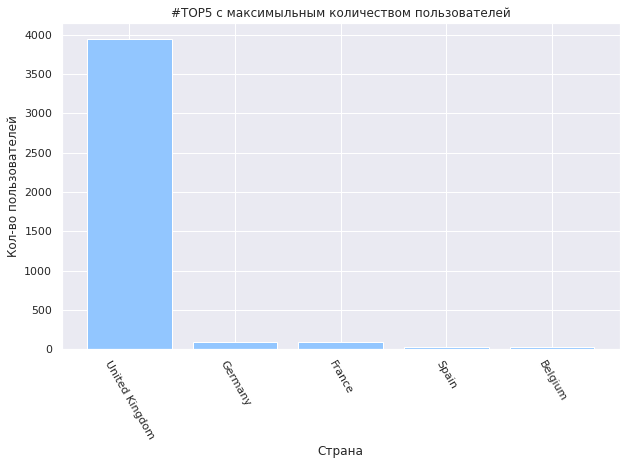

In [ ]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10,6))
    plt.bar(x=data_new1['Country'], height=data_new1['CustomerID'])
    plt.title('#TOP5 с максимыльным количеством пользователей')
    plt.ylabel('Кол-во пользователей')
    plt.xlabel('Страна')
    plt.xticks(rotation=300);

**Вывод** *Топ по странам занимает United Kingdom c числом пользователем 3949, следующая страна по численности Germany – 95 пользователей.*

**ТОП ПОЗИЦИЙ ПО ЗАКАЗАМ**

In [ ]:
#ТОР5 заказываемых продуктов
data_new2 = data_new['Description'].value_counts().sort_values(ascending=False).head(15)
data_new2

WHITE HANGING HEART T-LIGHT HOLDER    2365
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1726
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1228
JUMBO STORAGE BAG SUKI                1214
Name: Description, dtype: int64

**Вывод** *Самый заказываемый продукт WHITE HANGING HEART T-LIGHT HOLDER*

##Создаем ДФ для аналитики и визуализации

In [ ]:
#создаем дф, пользователями которые не заполнены 0, мы их на прошлых шагах заполняли. 397884 
df_data = data.query("CustomerID > 0")

In [ ]:
#смотрим сколько строк и какие данные с типом присутсвуют
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  int64         
 7   Country      406789 non-null  object        
 8   Total_sum    406789 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.0+ MB


**Смотрим выручку**


In [ ]:
#создаем дф , чтобы посмотреть продажи в рамках месяца и оценить продажи (идет рост , стагнация или падение)
df_data['InvoiceMonth'] = df_data['InvoiceDate'].dt.strftime('%Y-%m')
df_data_total_sum = df_data.groupby(df_data['InvoiceMonth']).agg({'Total_sum': 'sum'}).rename(columns={'Total_sum': 'TotalSum'}).reset_index()
df_data_total_sum.TotalSum = df_data_total_sum.TotalSum.astype('int64')
df_data_total_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceMonth,TotalSum
0,2010-12,554604
1,2011-01,475074
2,2011-02,436546
3,2011-03,579964
4,2011-04,426047
5,2011-05,648251
6,2011-06,608013
7,2011-07,574238
8,2011-08,616368
9,2011-09,931440


In [ ]:
import seaborn as sns

In [ ]:
#добавляем дату для аналитики
df_data.index = df_data.InvoiceDate

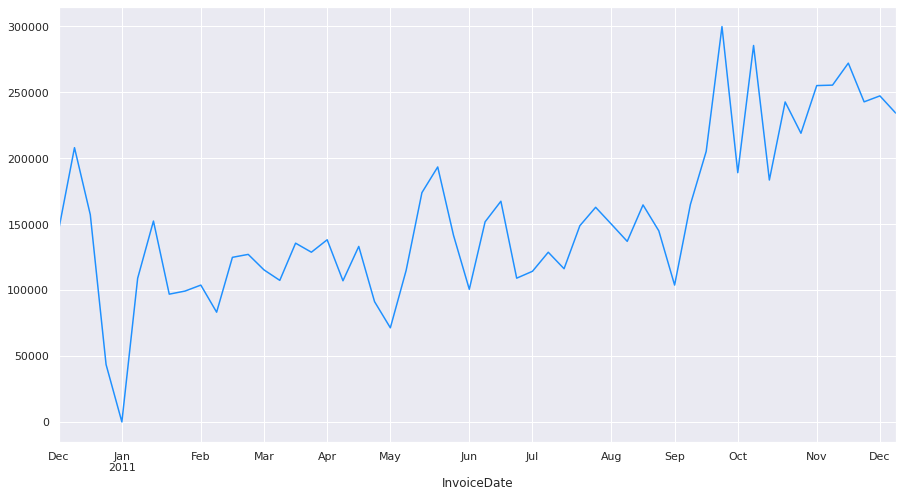

In [ ]:
#стороим визуализацию в размере по датам (не накопительно) и продаж
df_data_sum = df_data.resample('W').Total_sum.sum()
sns.set(rc={'figure.figsize': (15,8)}, style = 'darkgrid')
df_data_sum.plot(color = 'dodgerblue')

**Отклонение которое требует проверки** *Замечаем странное, в январе падение. нужно выяснить почему.*

In [ ]:
#достаем продажи за период, чтобы выясниь все ли норм с данными
df_data_sum['12-2010':'01-2011']

InvoiceDate
2010-12-05    145805.75
2010-12-12    208040.57
2010-12-19    157227.37
2010-12-26     43530.33
2011-01-02         0.00
2011-01-09    108968.86
2011-01-16    152375.61
2011-01-23     96916.76
2011-01-30     99270.78
Freq: W-SUN, Name: Total_sum, dtype: float64

 *нет продаж за 1.02 , в данный период был выходной день.*

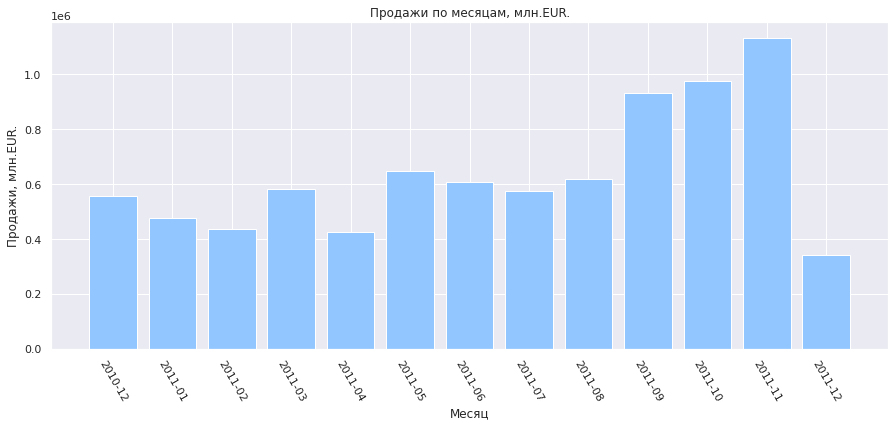

In [ ]:
#строим визуализацию по месяцам с продажами, чтобы оценить на каком этапе сейчас компания (рост, стагнация или падение)
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(15,6))
    plt.bar(x=df_data_total_sum['InvoiceMonth'], height=df_data_total_sum['TotalSum'])
    plt.title('Продажи по месяцам, млн.EUR.')
    plt.ylabel('Продажи, млн.EUR.')
    plt.xlabel('Месяц')
    plt.xticks(rotation=300);



**Вывод** *Максимальная выручка приходит на сентябрь-ноябрь. Это связано с увеличением спроса после летних выходных и ростом спроса предстоящими праздниками.*

**ТОП по пользователям и их транзакциям**

In [ ]:
#смотрим топ пользователей по заказам
df_data1 = df_data.groupby('CustomerID').agg({'InvoiceNo': 'count'}).rename(columns={'InvoiceNo': 'transactions'}).sort_values('transactions', ascending=False).reset_index().head()
df_data1

,CustomerID,transactions
0,17841,7983
1,14911,5901
2,14096,5128
3,12748,4641
4,14606,2782


**Посмотрим какое количество заказов делают пользователи**


In [ ]:
df_data_new = df_data.groupby('CustomerID').agg({'InvoiceNo': 'count'}).rename(columns={'InvoiceNo': 'transactions'}).sort_values('transactions', ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


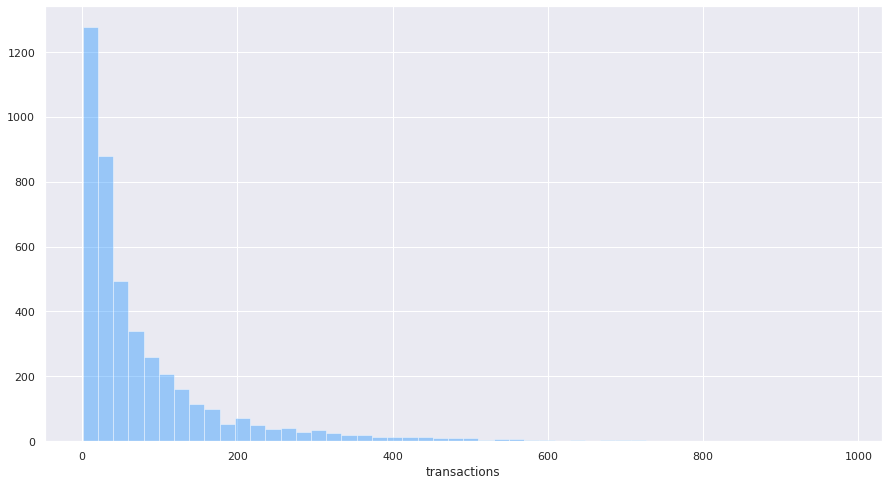

In [ ]:
sns.distplot(df_data_new.query('transactions < 1000').transactions, kde = False, color = 'dodgerblue')
sns.set(rc={'figure.figsize': (15,7)}, style = 'darkgrid')

**Вывод**  *исходя из визуализации выше, что большинство клиентов (более 1000 человек) совершили до 20 транзакций*

**Смотрим количество уникальных пользователей за каждый месяц**

In [ ]:
#смотрим данные
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sum,InvoiceMonth
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [ ]:
#смотрим уник пользователей по месяцам
df_data.resample('M').CustomerID.nunique()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1710
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

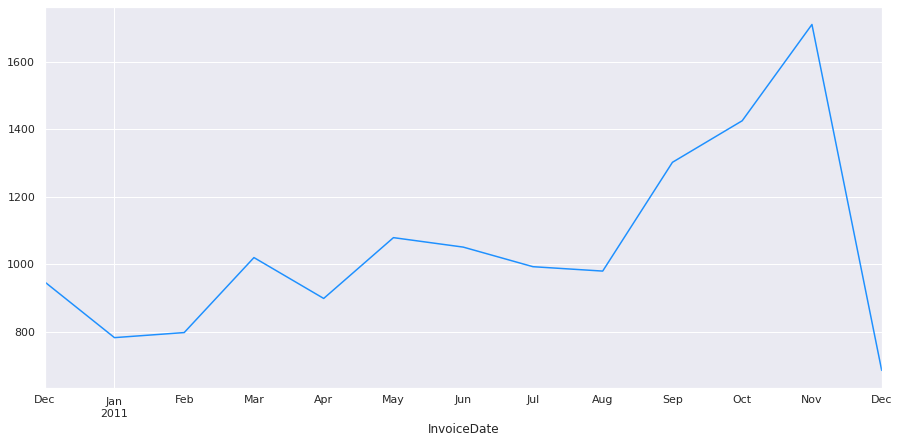

In [ ]:
#стороим визуализацию в размере месяца и количества уникальных пользователей.
df_data.resample('M').CustomerID.nunique().plot(color = 'dodgerblue')
sns.set(rc={'figure.figsize': (15,7)}, style = 'darkgrid')

**Вывод** *Максимальный месяц с уник пользователям ноябрь.*

**Смотрим количество транзакций за каждый месяц**

In [ ]:
#смотрим кол-во покупк по месяцам
df_data.resample('M').InvoiceNo.count()

InvoiceDate
2010-12-31    26847
2011-01-31    21909
2011-02-28    20362
2011-03-31    27820
2011-04-30    23196
2011-05-31    28906
2011-06-30    27836
2011-07-31    27500
2011-08-31    27656
2011-09-30    40820
2011-10-31    50692
2011-11-30    65584
2011-12-31    17661
Freq: M, Name: InvoiceNo, dtype: int64

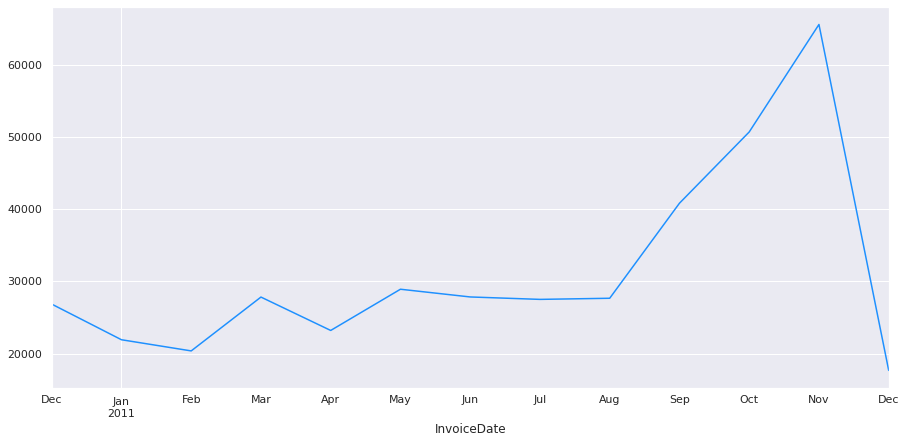

In [ ]:
#стороим визуализацию в размере месяца и количества транзакций.
df_data.resample('M').InvoiceNo.count().plot(color = 'dodgerblue')
sns.set(rc={'figure.figsize': (15,7)}, style = 'darkgrid')

**Вывод** *Максимальное количество транзакций ноябрь.*

**Средний чек на одного клиента**

In [ ]:
#df_data['InvoiceMonth'] = df_data['InvoiceDate'].dt.strftime('%Y-%m')

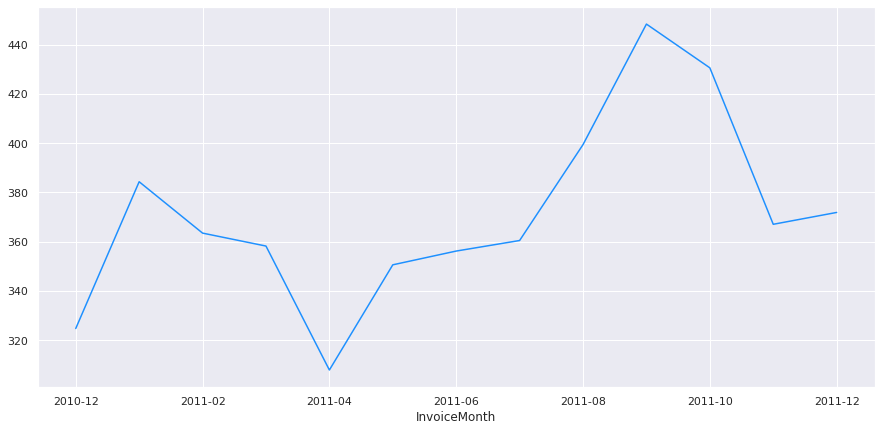

In [ ]:
#расчет среднего чека по месяцам.
aov = df_data.groupby(df_data['InvoiceMonth'])['Total_sum'].sum().divide(df_data.groupby(df_data['InvoiceMonth'])['InvoiceNo'].nunique())
sns.set(rc={'figure.figsize': (15,7)}, style = 'darkgrid')
aov.plot(color = 'dodgerblue')

In [ ]:
aov

InvoiceMonth
2010-12    324.709614
2011-01    384.364385
2011-02    363.485554
2011-03    358.223972
2011-04    307.838043
2011-05    350.595500
2011-06    356.188143
2011-07    360.476134
2011-08    399.460791
2011-09    448.454681
2011-10    430.668842
2011-11    367.068959
2011-12    371.885320
dtype: float64

**Вывод** *Из визуализации видно, что максимальный средний чек (AOV) был в сентябре, но в свою очеред количество заказов и пользователей упало. (это видно из графиков выше).*

##Прогнозирование

ПОДГОТОВКА ДАННЫХ

In [ ]:
#создаем датафрем на основе данных и выносим данные тотал продаз по годам и месяцам.
df_data_predict = df_data.groupby(df_data['InvoiceMonth']).agg({'Total_sum': 'sum'}).rename(columns={'Total_sum': 'TotalSum'}).reset_index()
df_data_predict[['Year','Month']] = df_data_predict['InvoiceMonth'].str.split('-', expand=True)
df_data_predict = df_data_predict[['TotalSum', 'Year', 'Month']]
df_data_predict.head(100)

,TotalSum,Year,Month
0,554604.020,2010,12
1,475074.380,2011,01
2,436546.150,2011,02
3,579964.610,2011,03
4,426047.851,2011,04
5,648251.080,2011,05
6,608013.160,2011,06
7,574238.481,2011,07
8,616368.000,2011,08
9,931440.372,2011,09


***Удаляем 12 месяц 2011 года, так как он не полный. Он влияет на предсказание продаж.***

In [ ]:
#удаляем строку 12
df_data_predict.drop(labels = [12],axis = 0, inplace = True)

In [ ]:
#смотрим тип данных столбцов, на нужны только числовые типы
df_data_predict.dtypes

TotalSum    float64
Year         object
Month        object
dtype: object

In [ ]:
#для прогнозирования нам потребуется тип целое число
df_data_predict.Year = df_data_predict.Year.astype('int64')
df_data_predict.Month = df_data_predict.Month.astype('int64')
df_data_predict.TotalSum = df_data_predict.TotalSum.astype('int64')

In [ ]:
#проверяем
df_data_predict.dtypes

TotalSum    int64
Year        int64
Month       int64
dtype: object

In [ ]:
#проверяем дф перед переходом к следующему шагу. данные приведены в числовое значение, 12 не полный месяц удален.
df_data_predict.head(100)

,TotalSum,Year,Month
0,554604,2010,12
1,475074,2011,1
2,436546,2011,2
3,579964,2011,3
4,426047,2011,4
5,648251,2011,5
6,608013,2011,6
7,574238,2011,7
8,616368,2011,8
9,931440,2011,9


##Линейная регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#признаками будут год и месяц, а целевой переменной - сгруппированные объёмы продаж по месяц-год
X = df_data_predict[['Year', 'Month']]
y = df_data_predict['TotalSum']

In [ ]:
# Разделение выборку для обучения и тестирования
# test_size - отвечает за размер тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19) 

In [ ]:
#берем модель и обучаем
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Выводим массив для просмотра наших ответов (меток)
print (y_test)

9    931440
6    608013
4    426047
Name: TotalSum, dtype: int64


In [ ]:
# Коэффициенты который дал обучающий датасет
model.coef_

array([475184.29548387,  57160.31354839])

RMSE среднеквадратичная ошибка

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn
#https://pythobyte.com/rmse-root-mean-square-error-9ac86324/

In [ ]:
# оцениваем модель используя rmse train и test
RMSE_train = np.sqrt(sklearn.metrics.mean_squared_error(y_train, model.predict(X_train)))

print("Root Mean Square Error _train:\n")
print(round(RMSE_train))

RMSE_test = np.sqrt(sklearn.metrics.mean_squared_error(y_test, model.predict(X_test)))

print("Root Mean Square Error _test:\n")
print(round(RMSE_test))

Root Mean Square Error _train:

106696
Root Mean Square Error _test:

104897


In [ ]:
#напомним данные которые мы имеем)
df_data_predict.head(100)

,TotalSum,Year,Month
0,554604,2010,12
1,475074,2011,1
2,436546,2011,2
3,579964,2011,3
4,426047,2011,4
5,648251,2011,5
6,608013,2011,6
7,574238,2011,7
8,616368,2011,8
9,931440,2011,9


In [ ]:
# предсказываем для следующих месяцев, тк 12 не полный его пересчитываем
X_future = np.array([[2011,12], [2012,1], [2012,2]])

In [ ]:
#записываем данные
y_future = model.predict(X_future)
y_future

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1029788.29548383,  876209.14193547,  933369.45548379])

**ВЫВОД по RMSE и прогнозу будущих периодов:**

*RMSE для train и test наборов очень похожими (train > test), это говорит о том, что мы построили хорошую модель. Модель имеет большую прогностическую ценность.*


> *RMSE_train: 106 696*

> *RMSE_test: 104 897*

*В этом случае мы можем доверять прогнозу, произведенным после обучения и оценки модели, но нужно учитывать погрешность.*
*   *12.2011  - 1 029 788*
*   *01.2012  - 876 209*
*   *02.2012  - 933 369*




**ОБЩИЙ ВЫВОД:**

*Для прогнозирования на ближайшие 3 месяца была применена линейная регрессионная модель.*
*Расчитали значение RMSE, расчитали прогнозные цифры на 12.2011 - 02.2012. В расчетах есть погрешность, но основываясь на результатах прогноза, можно выявить, что объем продаж прогнозна аналогичен и даже выше прошлого года.
Это говорит нам о том , что компания находится на этапе роста. Стагнации и рецессии не наблюдается.*

*Рост продаж более чем на +50% к среднему значению можно обосновать выход с летнего периода и предстоящих праздников. Увеличить продажи и удерживать их на данном уровне можно совместной работой маркетинга и отдела продаж, вывод новинок на рынок, промо акции для поддержки продаж, увеличение лояльности клиентской базы.*